# Bài tập Decision Tree and Random Forest
Mai Chí Bảo - 2370691

## Sử dụng Decision Tree để phân nhóm cho tập Iris dataset
- dataset: 'Iris.csv'


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
df = pd.read_csv('Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# Loại bỏ cột Id vì không cần thiết
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Khởi tạo Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá độ chính xác
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


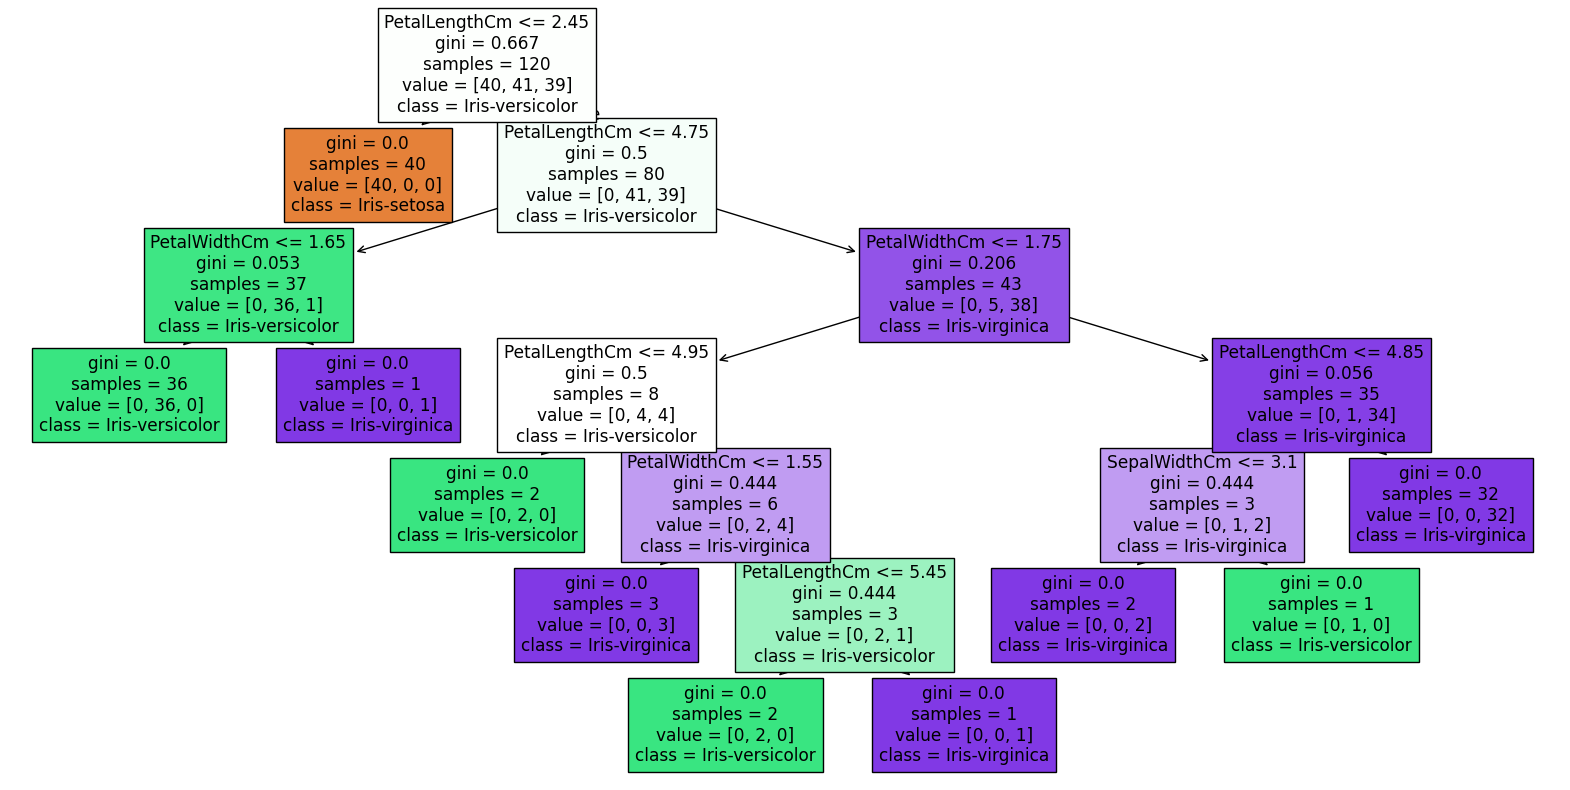

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=df['Species'].unique(), filled=True)
plt.show()


## Sử dụng Random Forest để phân nhóm cho tập Iris dataset
- dataset: 'Iris.csv'


In [13]:
from sklearn.ensemble import RandomForestClassifier


In [14]:
# Khởi tạo Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình
rf_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [15]:
# Dự đoán trên tập kiểm tra
y_pred_rf = rf_clf.predict(X_test)

# Đánh giá độ chính xác
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [16]:
dt_acc = accuracy_score(y_test, y_pred)
rf_acc = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {dt_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")

if rf_acc > dt_acc:
    print("Random Forest performs better than Decision Tree on this dataset.")
elif rf_acc < dt_acc:
    print("Decision Tree performs better than Random Forest on this dataset.")
else:
    print("Both models perform equally on this dataset.")


Decision Tree Accuracy: 1.0000
Random Forest Accuracy: 1.0000
Both models perform equally on this dataset.


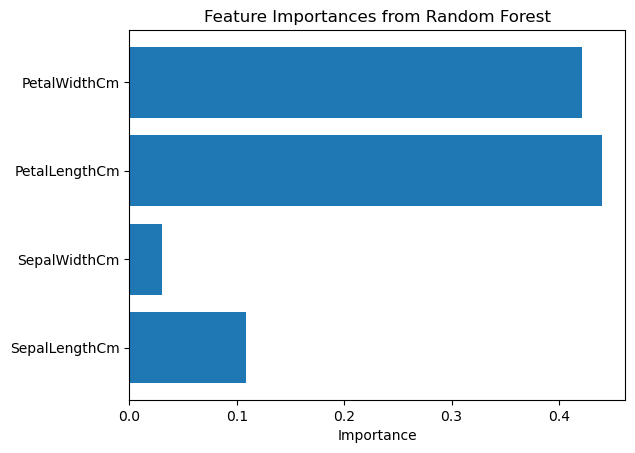

In [17]:
import matplotlib.pyplot as plt

feature_importances = rf_clf.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Importance")
plt.title("Feature Importances from Random Forest")
plt.show()
